In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [58]:
df = sns.load_dataset('iris')

In [59]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [60]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [61]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [62]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

In [64]:
tree_classifier = DecisionTreeClassifier()

In [65]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.36363636363636365, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 127\nvalue = [42, 41, 44]'),
 Text(0.2727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.3181818181818182, 0.8571428571428572, 'True  '),
 Text(0.45454545454545453, 0.7857142857142857, 'x[2] <= 4.85\ngini = 0.499\nsamples = 85\nvalue = [0.0, 41.0, 44.0]'),
 Text(0.40909090909090906, 0.8571428571428572, '  False'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7272727272727273, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.124\nsamp

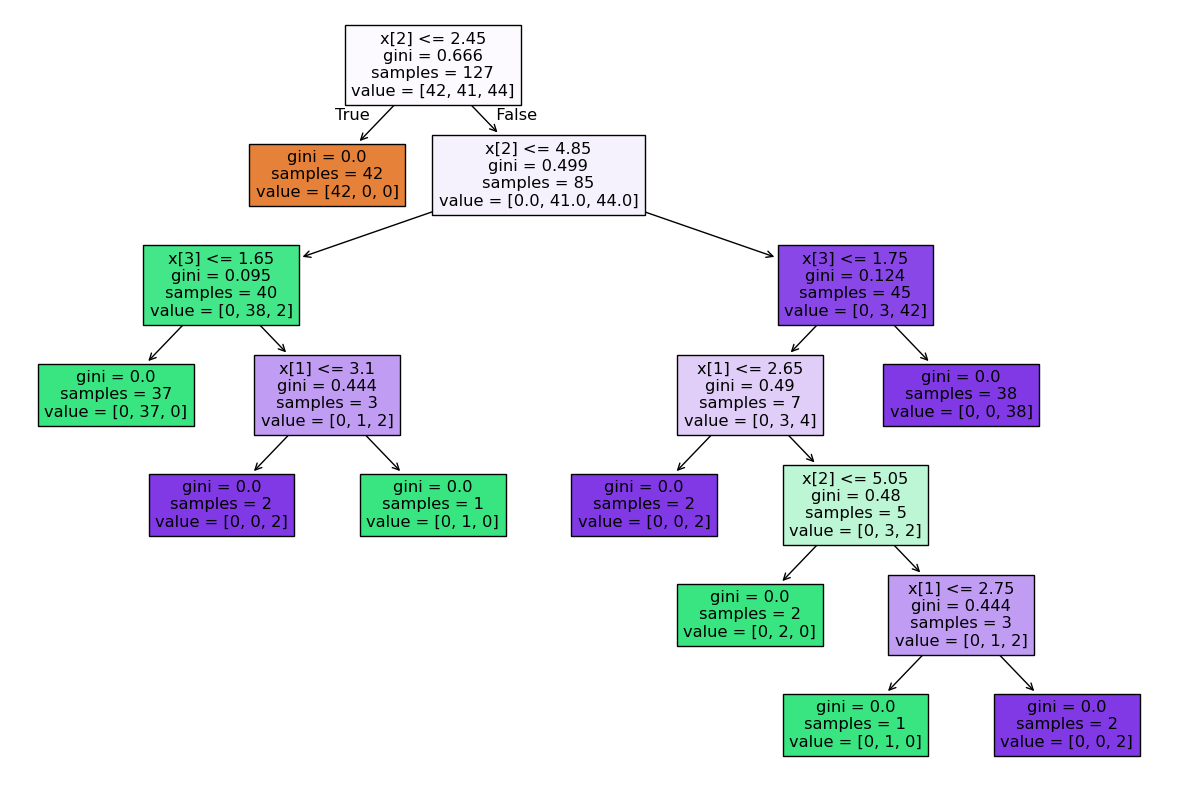

In [66]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classifier, filled=True)

In [67]:
y_pred = tree_classifier.predict(X_test)

In [68]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2])

In [69]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9565217391304348
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.95        23
weighted avg       0.96      0.96      0.96        23



<br>

**Applying Prunuing**

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 127\nvalue = [42, 41, 44]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.499\nsamples = 85\nvalue = [0.0, 41.0, 44.0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.124\nsamples = 45\nvalue = [0, 3, 42]')]

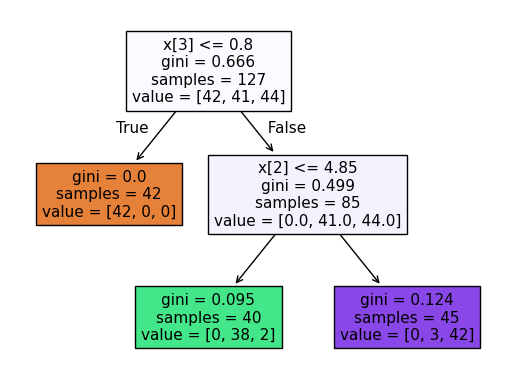

In [74]:
tree_classifier = DecisionTreeClassifier(max_depth=2, random_state=10)

tree_classifier.fit(X_train, y_train)
tree.plot_tree(tree_classifier, filled=True)

In [75]:
y_pred = tree_classifier.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9130434782608695
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      0.89      0.89         9
           2       0.83      0.83      0.83         6

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



<br>
<br>

## **Testing Model Performance**

In [82]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random values for features based on typical Iris dataset ranges
sepal_length = np.random.uniform(4.5, 8.0, n_samples)  # cm
sepal_width  = np.random.uniform(2.0, 4.5, n_samples)
petal_length = np.random.uniform(1.0, 7.0, n_samples)
petal_width  = np.random.uniform(0.1, 2.5, n_samples)

# Assign species based on simplified ranges
species = []
for i in range(n_samples):
    if petal_length[i] < 2.5:
        species.append('setosa')
    elif petal_length[i] < 5.0:
        species.append('versicolor')
    else:
        species.append('virginica')

# Create DataFrame
test_df = pd.DataFrame({
    'sepal_length': sepal_length,
    'sepal_width': sepal_width,
    'petal_length': petal_length,
    'petal_width': petal_width,
    'species': species
})

test_df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.810890,2.078573,4.852190,0.224036,versicolor
1,7.827500,3.591026,1.504840,1.375251,setosa
2,7.061979,2.785890,1.969772,1.397524,setosa
3,6.595305,3.271427,6.391325,1.629832,virginica
4,5.046065,4.268916,4.638574,1.842619,versicolor
5,5.045981,2.623231,1.055182,2.442045,setosa
6,4.703293,3.025957,1.608829,1.339121,setosa
7,7.531617,3.888878,4.981011,0.875096,versicolor
8,6.603903,2.571995,1.030370,2.008447,setosa
9,6.978254,2.192450,1.964848,0.749997,setosa


In [84]:
setosa_df = df[df['species']==0].sample(n=34, replace=True)
versicolor_df = df[df['species']==1].sample(n=33, replace=True)
virginica_df = df[df['species']==2].sample(n=33, replace=True)
synthetic_df = pd.concat([setosa_df, versicolor_df, virginica_df]).reset_index(drop=True)


In [83]:
# Encode species for test data
test_df['species'] = le.transform(test_df['species'])

X_new = test_df.iloc[:,:-1]
y_new = test_df.iloc[:,-1]

y_new_pred = tree_classifier.predict(X_new)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on synthetic data:", accuracy_score(y_new, y_new_pred))
print(classification_report(y_new, y_new_pred))


Accuracy on synthetic data: 0.51
              precision    recall  f1-score   support

           0       0.13      0.17      0.15        24
           1       0.56      0.60      0.57        42
           2       0.88      0.65      0.75        34

    accuracy                           0.51       100
   macro avg       0.52      0.47      0.49       100
weighted avg       0.56      0.51      0.53       100

